## First simple linear regression in Python

<strong>Linear regression </strong> is a regression model that estimates the <span style="color:red">relationship</span> between one <span style="color:red">independent variable</span> and one <span style="color:red">dependent variable</span> using a <span style="color:red">straight line</span>

In [1]:
import numpy as np   # allow to work with multi-dimentional arrays
import pandas as pd   # allow to organize data in a tabular form
import scipy # tools for scientific computations
import statsmodels.api as sm # build on top of numpy and scipy: statistics in py => good summary
import matplotlib.pyplot as plt # visualization of numpy computation
import seaborn as sns # visualization library based on matplotlib. A high level interface for drawing attractive statistical graphics
import sklearn # machine learning library

C:\Users\Tuyen\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Below we load a dataset of 84 data points (SAT, GPA) of 84 students

In [2]:
data = pd.read_csv('1.01. Simple linear regression.csv')
data

,SAT,GPA
0,1714,2.40
1,1664,2.52
2,1760,2.54
3,1685,2.74
4,1693,2.83


In [8]:
data['SAT'].size

84

Lets visualize the data with a scatter plot, in which SAT corresponds to the x horizontal line and GPA corresponds to y vertical line.

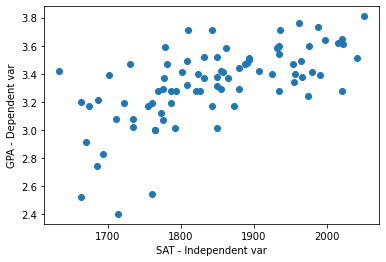

In [26]:
fig, ax = plt.subplots()

plt.xlabel('SAT - Independent var')
plt.ylabel('GPA - Dependent var')

ax.scatter(data['SAT'], data['GPA'])

Observing the scatter plot, the SAT and the GPA follows a linear relationship.


The <strong>best fit line y=mx+b</strong> for the data points in the above chart can be computed using <strong>statsmodel</strong> library 

In [30]:
# pick dependent variable and independent variable for the model
# SAT is the independent variable
# GPA is the dependent variable
x = sm.add_constant(data['SAT']) # add constant b to the model
y = data['GPA']

In [31]:
# create a Ordinary Least Square model
model = sm.OLS(y, x)

In [32]:
# find the best fit line for the data points
result = model.fit()

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GPA   R-squared:                       0.406
Model:                            OLS   Adj. R-squared:                  0.399
Method:                 Least Squares   F-statistic:                     56.05
Date:                Sat, 17 Sep 2022   Prob (F-statistic):           7.20e-11
Time:                        16:49:36   Log-Likelihood:                 12.672
No. Observations:                  84   AIC:                            -21.34
Df Residuals:                      82   BIC:                            -16.48
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2750      0.409      0.673      0.503      -0.538       1.088
SAT            0.0017      0.000      7.487      0.000       0.001       0.002
==============================================================================
Omnibus:                       12.839   Durbin-Watson:                   0.950
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.155
Skew:                          -0.722   Prob(JB):                     0.000310
Kurtosis:                       4.590   Cond. No.                     3.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary above tells us a lot about our linear regression model, but for now, we only look at two parameters: "coef" of the constant and the "coef" of SAT. These will give us the m and b values for our best fit line.

In [33]:
m=0.0017
b=0.2750

Next, we will plot the line: y=0.0017x+0.275 where x is a data point of SAT and y is the corresponding GPA

1613.2
2070.8


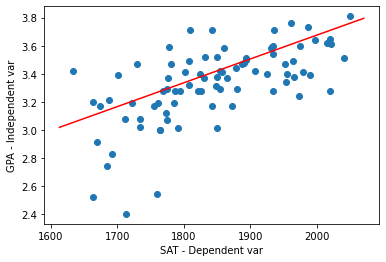

In [25]:
# draw scatter plot
fig, ax = plt.subplots()

plt.xlabel('SAT - Dependent var')
plt.ylabel('GPA - Independent var')

ax.scatter(data['SAT'], data['GPA'])

# draw the regression line
xmin, xmax = plt.xlim()
ymin, ymax = m*xmin+b, m*xmax+b
ax.plot([xmin, xmax], [ymin, ymax],color='red')


The red line is the best fit line that minimizes the distance between it and the data points (GPA, SAT)

<span style="color:green">Our goal in this notebook is to create the best fit line without using available statsmodel library. To do that, lets dive in to some Math concepts in Caculus 